In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier


In [79]:
##查看关于corrected中的数据
train_data = pd.read_csv('./dataset/kddcup.data_10_percent_corrected', header=None)
test_data = pd.read_csv('./dataset/corrected', header=None)

features_single_tcp_connetct_columns=["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes","land", "wrong_fragment", "urgent"]#单一TCP连接特征
features_Content_features_columns = ["hot", "num_failed_logins", "logged_in","num_compromised", "root_shell", "su_attempted", "num_root",  #登录特征
    "num_file_creations","num_shells", "num_access_files", "num_outbound_cmds", "is_host_login","is_guest_login"]
features_Traffic_within_twoscconds_columns =[    "count", "srv_count", "serror_rate", "srv_serror_rate","rerror_rate", 
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate","srv_diff_host_rate"]
features_DST_Traffic_within_twoscconds_columns = [  "dst_host_count", "dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate", "dst_host_srv_serror_rate","dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
label = ["label"]
columns = features_single_tcp_connetct_columns+features_Content_features_columns+features_Traffic_within_twoscconds_columns+features_DST_Traffic_within_twoscconds_columns+label
train_data.columns = columns
test_data.columns = columns

In [80]:
train_data.drop(columns=['num_outbound_cmds','is_host_login'],inplace=True)
test_data.drop(columns=['num_outbound_cmds','is_host_login'],inplace=True)
features_Content_features_columns.remove('num_outbound_cmds')
features_Content_features_columns.remove('is_host_login')

In [81]:
#str变为数值类型
categorical_columns = ["protocol_type", "service", "flag"]
label_encoders = {}
for col in categorical_columns:
    all_categories = pd.concat([train_data[col], test_data[col]], axis=0).unique()
    label_encoders[col] = LabelEncoder()
    label_encoders[col].fit(all_categories)
    train_data[col] = label_encoders[col].transform(train_data[col])
    test_data[col] = label_encoders[col].transform(test_data[col])  # 使用相同的编码规则

In [82]:
single_connect_data = train_data[features_single_tcp_connetct_columns]
Content_data = train_data[features_Content_features_columns]
SrcTraffic_data = train_data[features_Traffic_within_twoscconds_columns]
DstTraffic_data = train_data[features_DST_Traffic_within_twoscconds_columns]

In [1]:
train_data.describe()

NameError: name 'train_data' is not defined

In [84]:
test_data.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,311029.000000,311029.000000,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,0.555456,25.197589,7.642901,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,0.647019,14.657280,2.830005,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.000000,9.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,14.000000,9.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,46.000000,9.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,2.000000,66.000000,10.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'protocol_type'}>,
        <Axes: title={'center': 'service'}>],
       [<Axes: title={'center': 'flag'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>],
       [<Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'urgent'}>]], dtype=object)

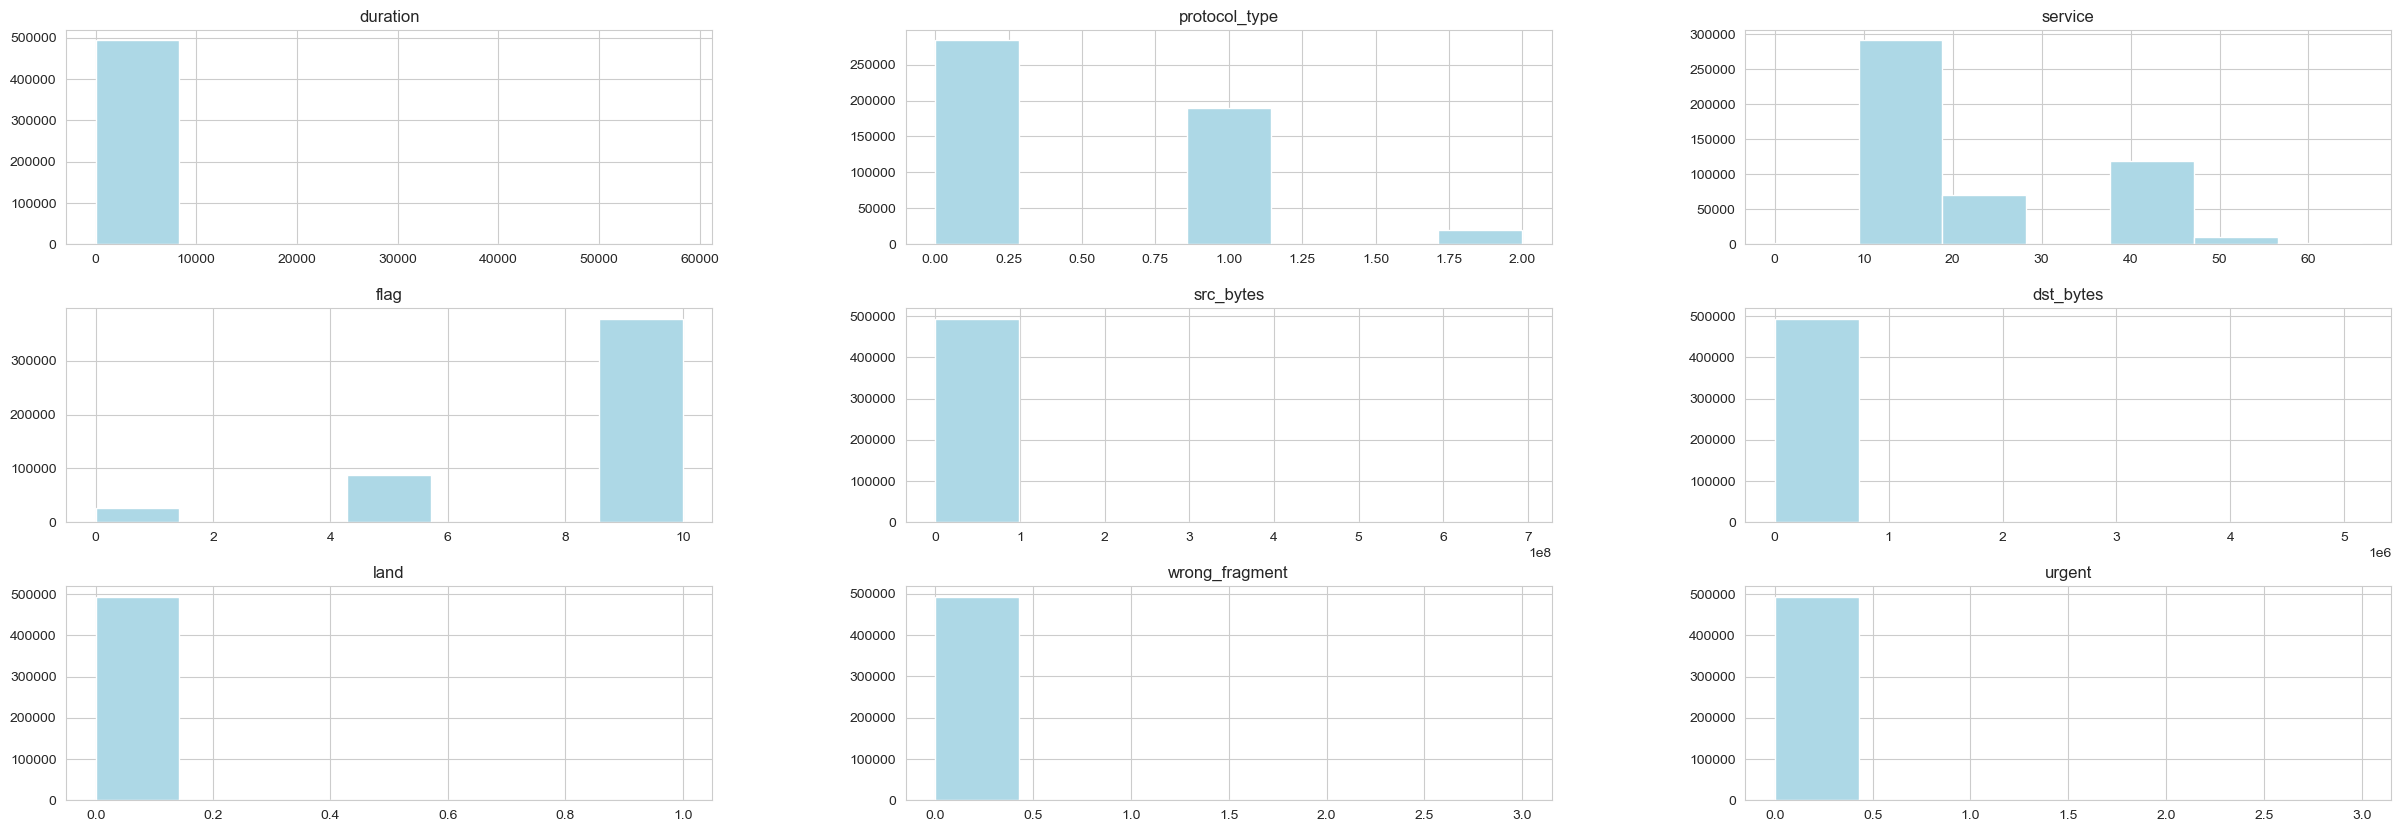

In [85]:
single_connect_data.hist(figsize=(30, 10), bins=7, color='lightblue') #单个TCP连接

array([[<Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>],
       [<Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>],
       [<Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>],
       [<Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'is_guest_login'}>, <Axes: >]],
      dtype=object)

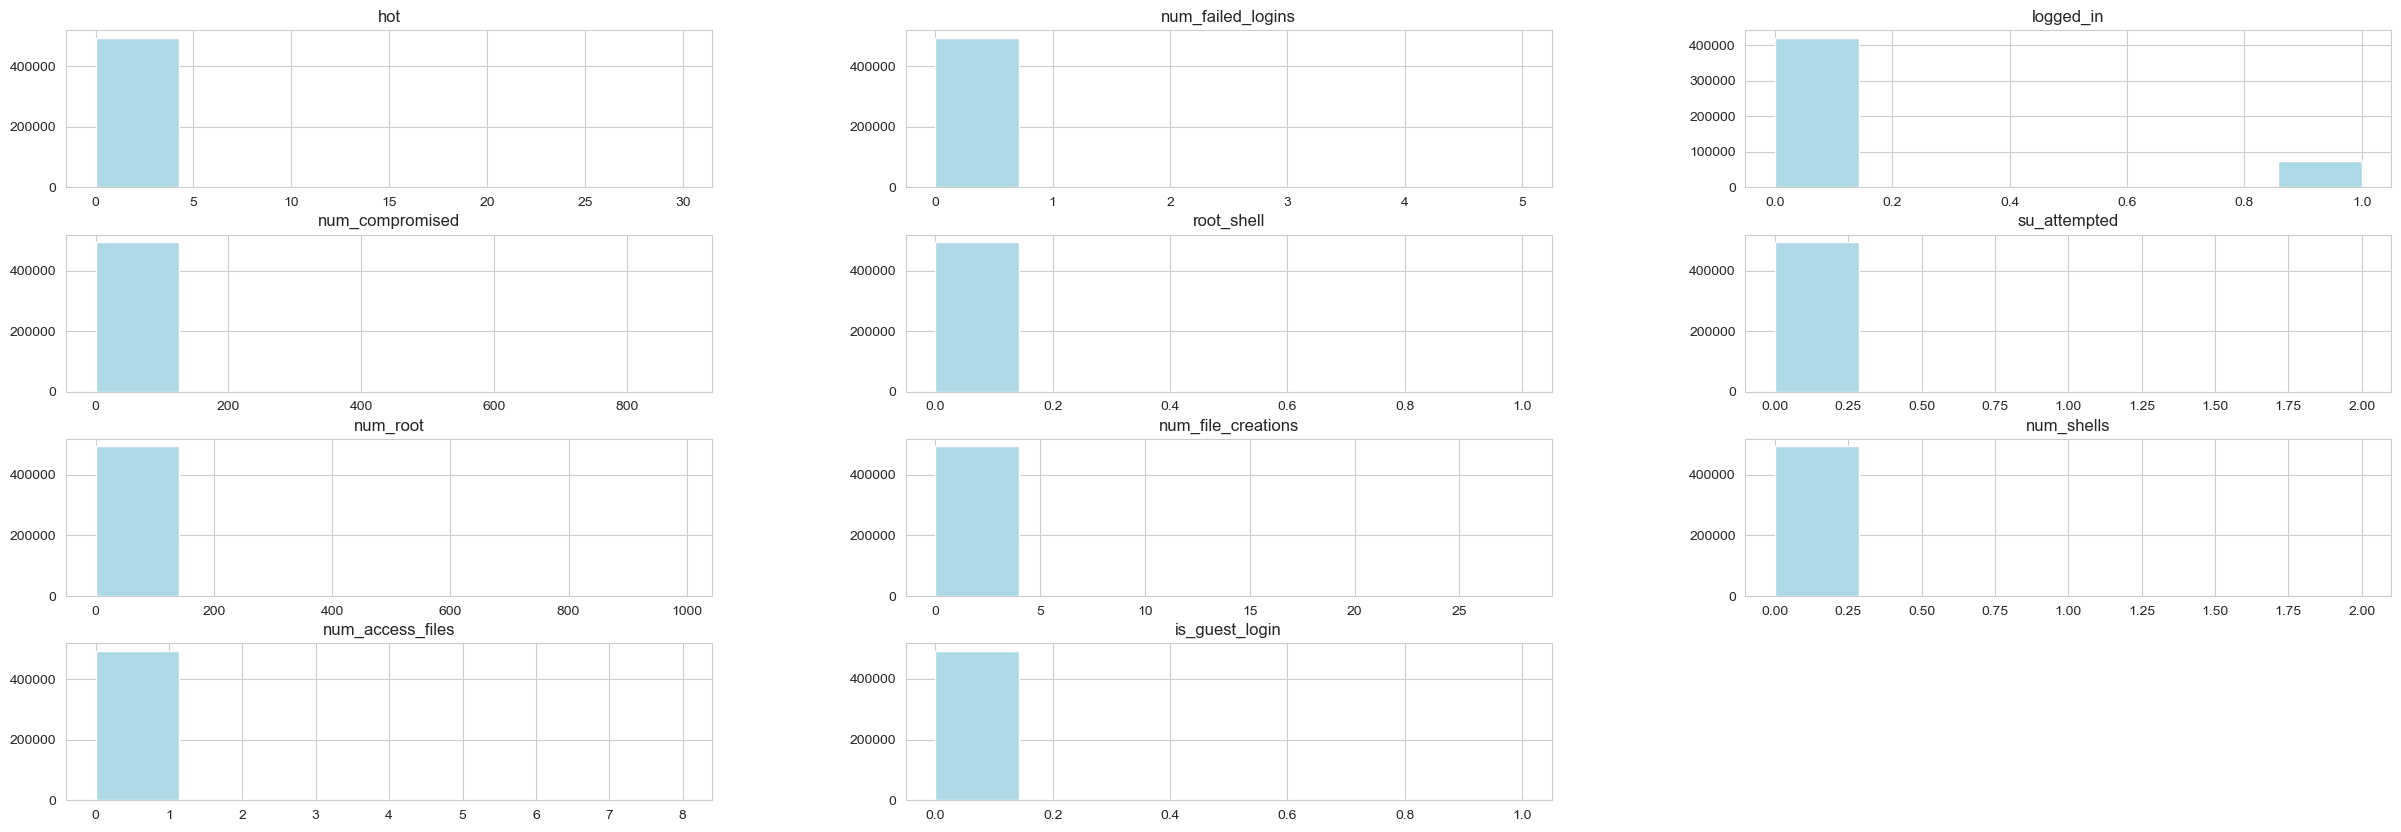

In [86]:
Content_data.hist(figsize=(30, 10), bins=7, color='lightblue') #连接特征

array([[<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'srv_count'}>,
        <Axes: title={'center': 'serror_rate'}>],
       [<Axes: title={'center': 'srv_serror_rate'}>,
        <Axes: title={'center': 'rerror_rate'}>,
        <Axes: title={'center': 'srv_rerror_rate'}>],
       [<Axes: title={'center': 'same_srv_rate'}>,
        <Axes: title={'center': 'diff_srv_rate'}>,
        <Axes: title={'center': 'srv_diff_host_rate'}>]], dtype=object)

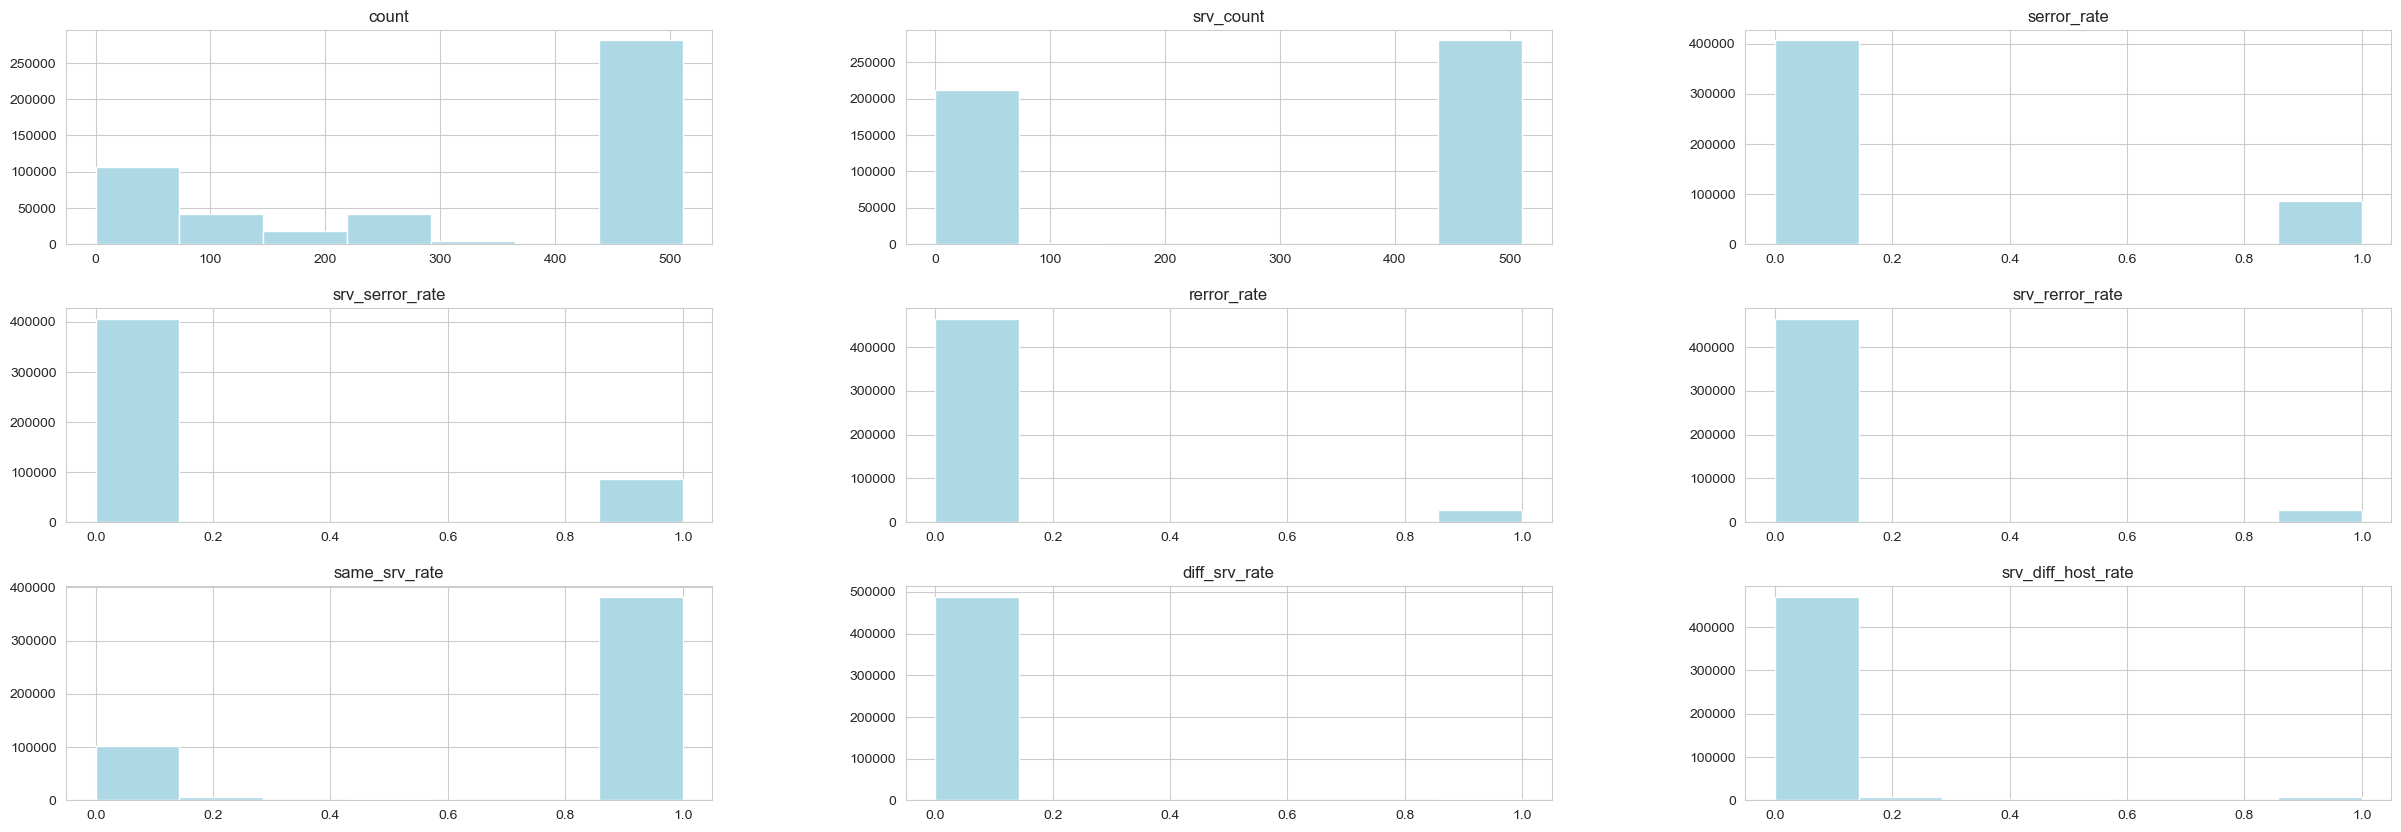

In [87]:
SrcTraffic_data.hist(figsize=(30, 10), bins=7, color='lightblue') #本机 传输数据特征

array([[<Axes: title={'center': 'dst_host_count'}>,
        <Axes: title={'center': 'dst_host_srv_count'}>,
        <Axes: title={'center': 'dst_host_same_srv_rate'}>],
       [<Axes: title={'center': 'dst_host_diff_srv_rate'}>,
        <Axes: title={'center': 'dst_host_same_src_port_rate'}>,
        <Axes: title={'center': 'dst_host_srv_diff_host_rate'}>],
       [<Axes: title={'center': 'dst_host_serror_rate'}>,
        <Axes: title={'center': 'dst_host_srv_serror_rate'}>,
        <Axes: title={'center': 'dst_host_rerror_rate'}>],
       [<Axes: title={'center': 'dst_host_srv_rerror_rate'}>, <Axes: >,
        <Axes: >]], dtype=object)

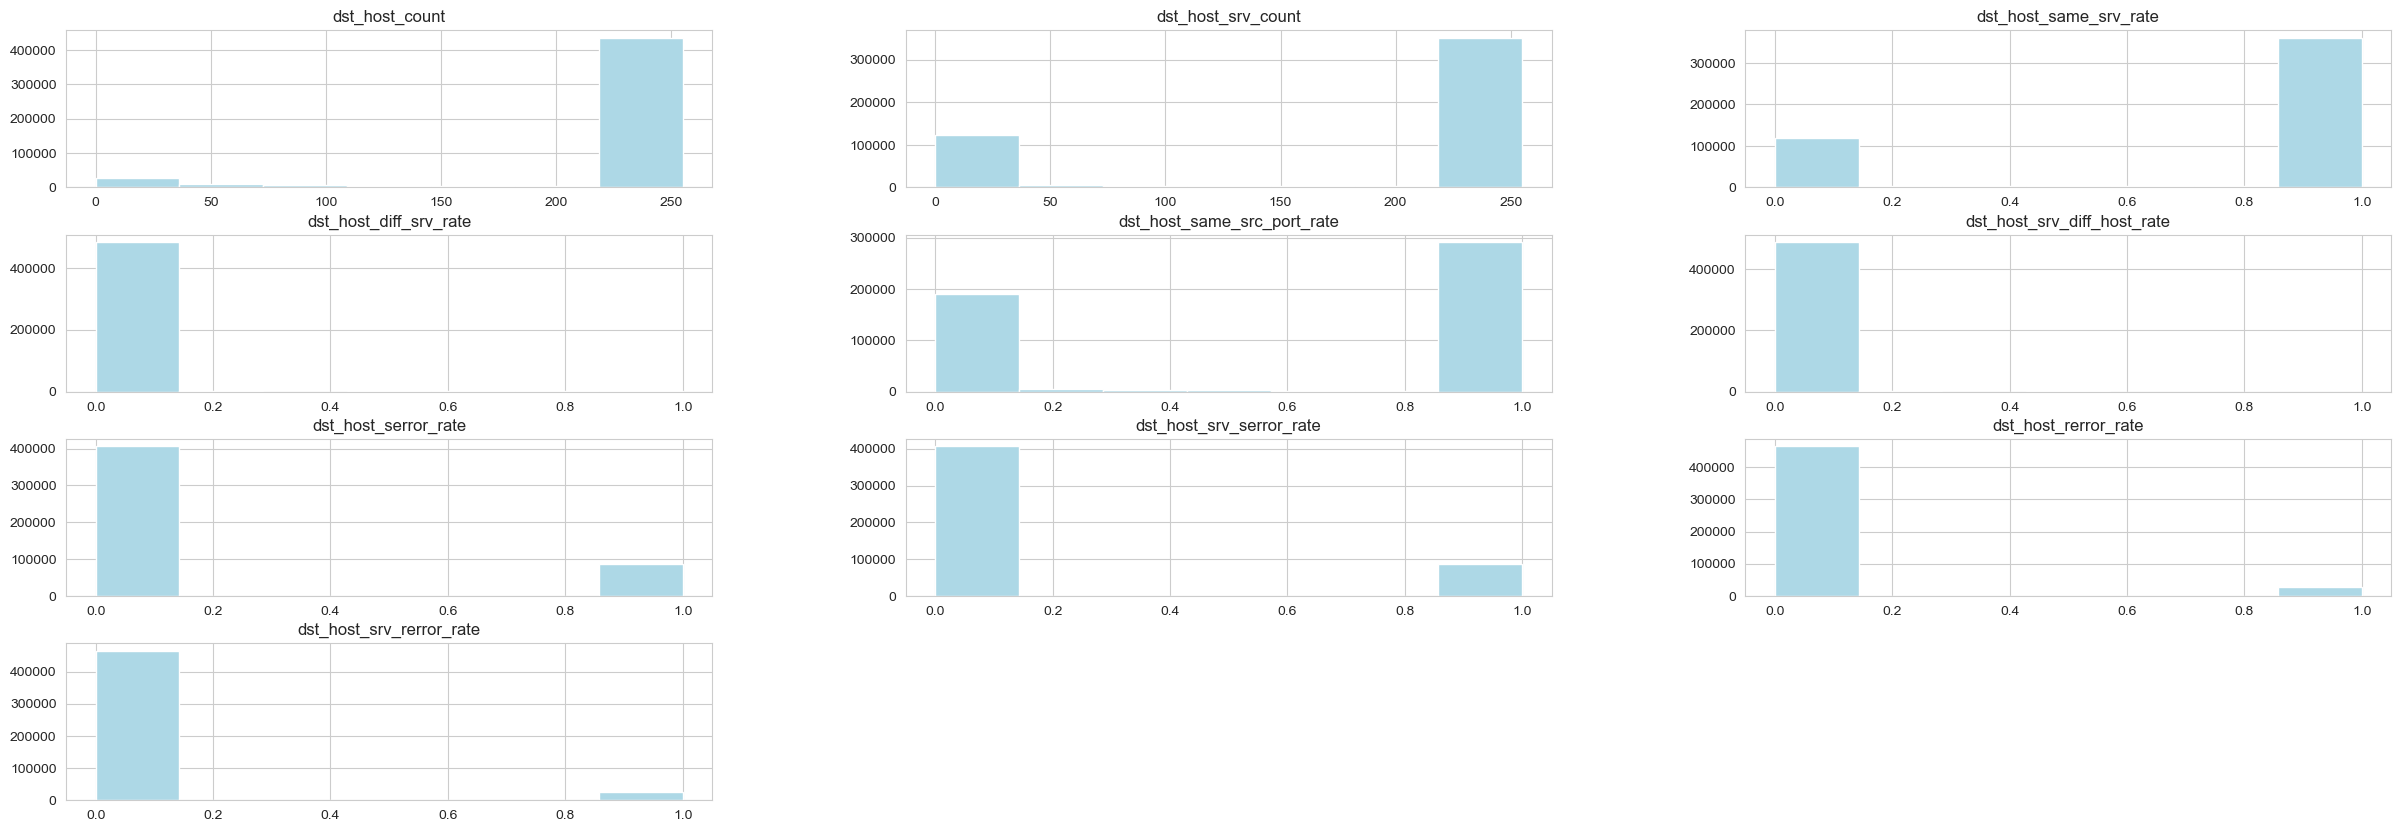

In [88]:
DstTraffic_data.hist(figsize=(30, 10), bins=7, color='lightblue') #目标本机 传输数据特征

# 相关性分析
4种相关特征的相关性分析

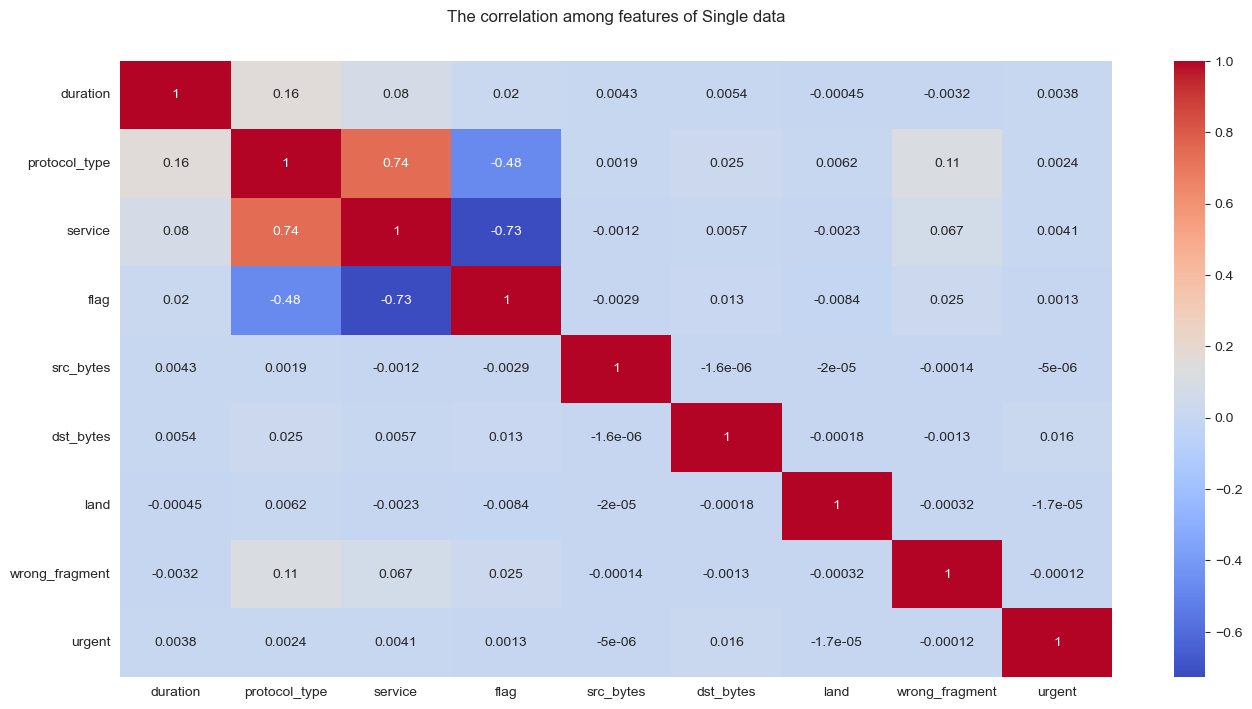

In [89]:
# 单个tcp相关性分析
correlation_matrix = single_connect_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of Single data',y= 1.05)
plt.savefig('./picture/correlation_single.png')

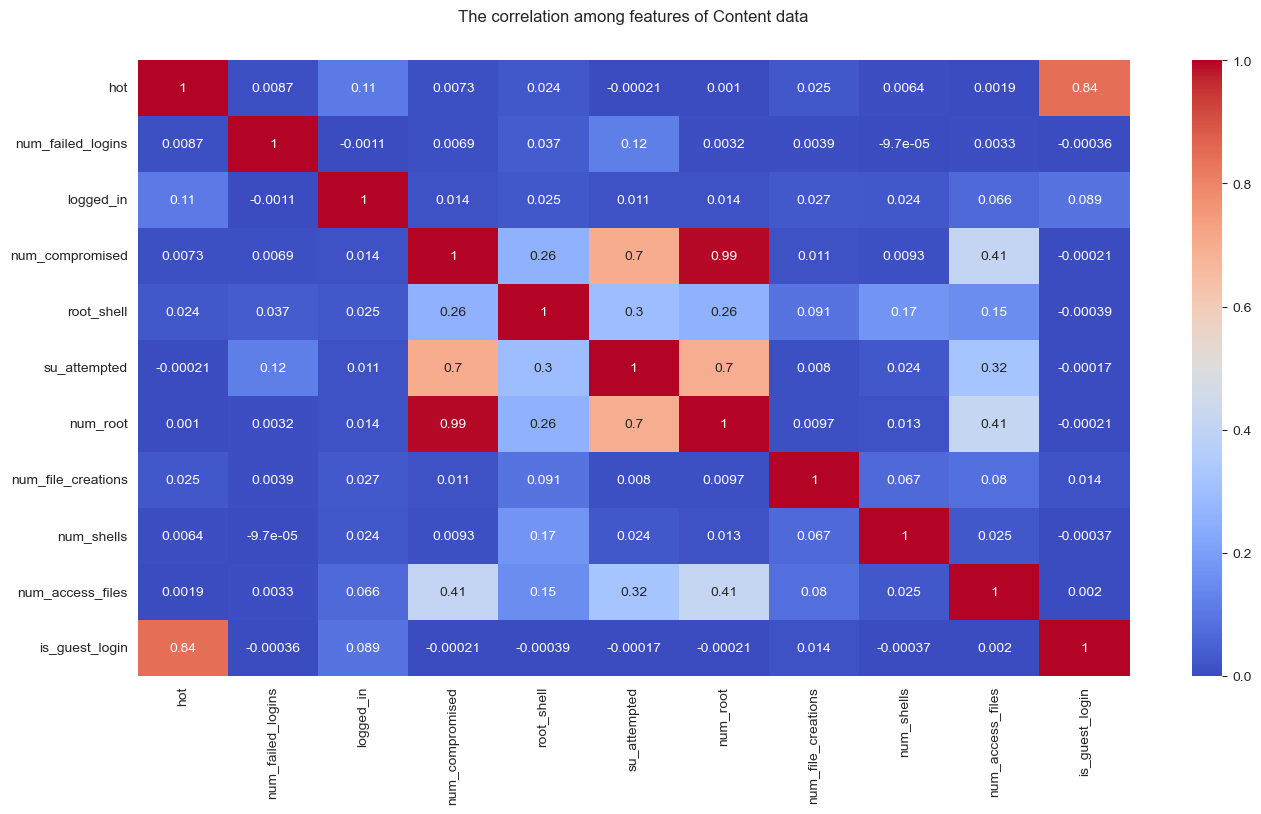

In [90]:
# 连接特征相关性分析
correlation_matrix = Content_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of Content data',y= 1.05)
plt.savefig('./picture/correlation_Content.png')

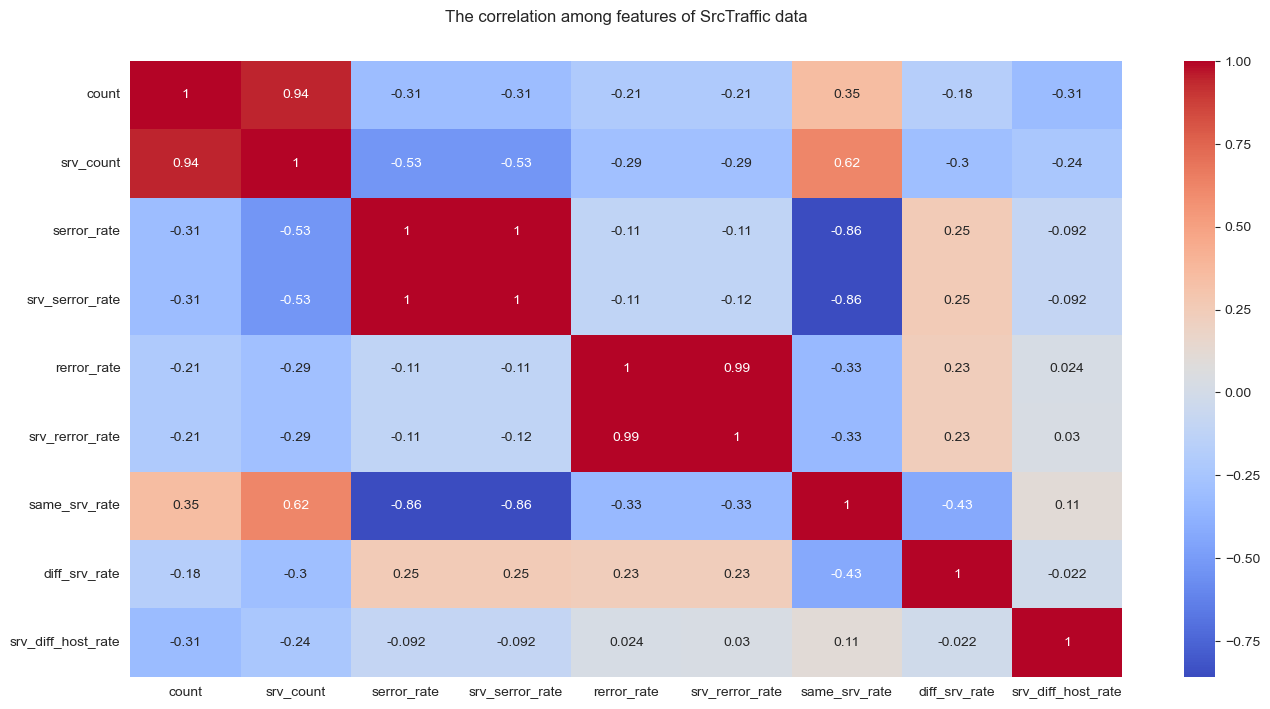

In [91]:
# 连接特征相关性分析
correlation_matrix = SrcTraffic_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of SrcTraffic data',y= 1.05)
plt.savefig('./picture/correlation_SrcTraffic.png')

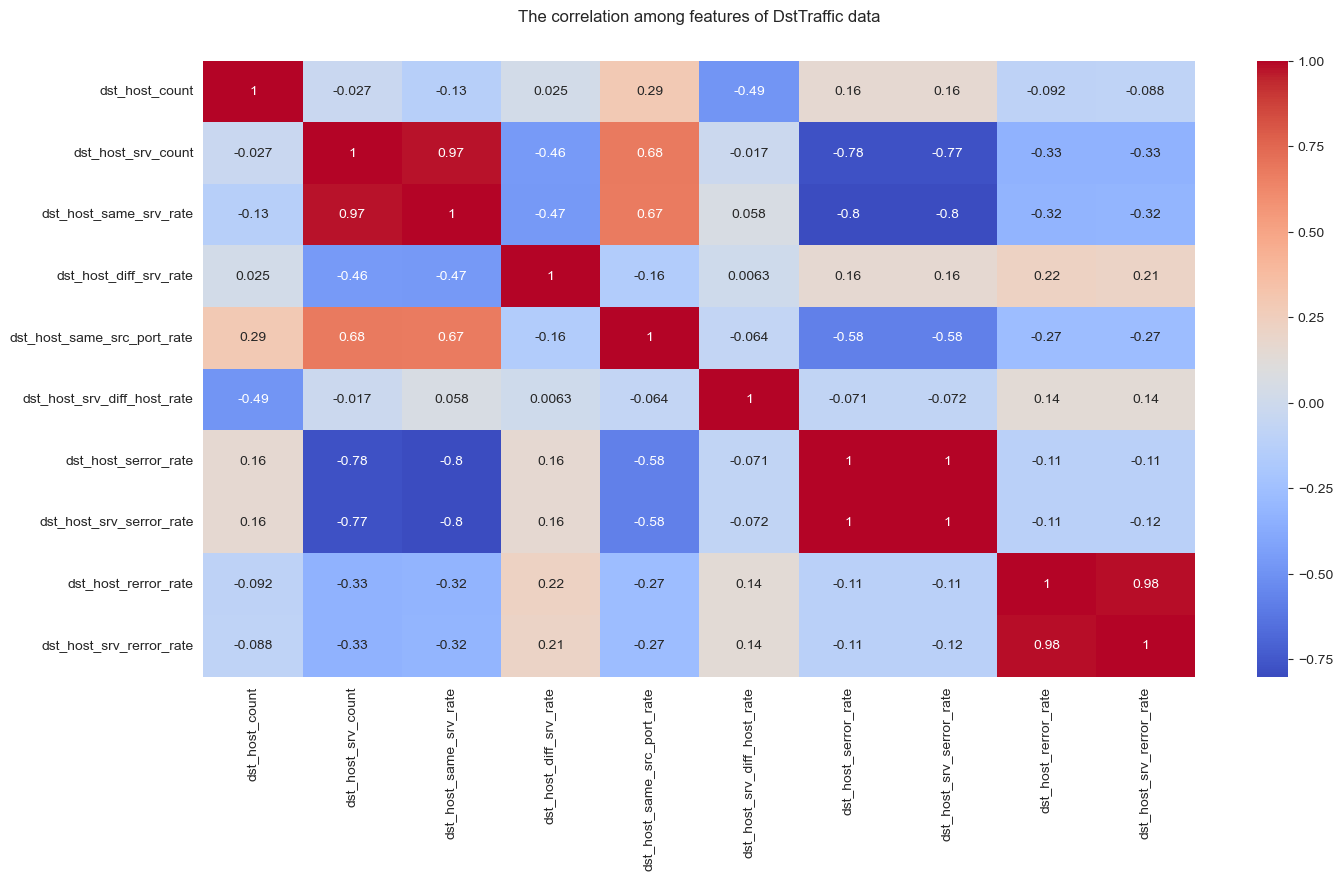

In [92]:
# 连接特征相关性分析
correlation_matrix = DstTraffic_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title('The correlation among features of DstTraffic data',y= 1.05)
plt.savefig('./picture/correlation_DstTraffic.png')